# Simple iteration for systems of linear equations

First, generate a random diagonally dominant matrix, for testing.

In [90]:
import numpy as np
import matplotlib.pyplot as plt
rndm = np.random.RandomState(1234)

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b = rndm.uniform(size=n)

# I.  Jacobi iteration

Given

$$
A x = b
$$

separate the diagonal part $D$,

$$ A = D + (A - D) $$

and write

$$
x = D^{-1} (D - A) x + D^{-1} b\;.
$$

Then iterate

$$
x_{n + 1} = B x_{n} + c\;,
$$

where 

$$
B = D^{-1} (A - D) \qquad \text{and} \qquad c = D^{-1} b
$$


Let's construct the matrix and the r.h.s. for the Jacobi iteration

In [8]:
diag_1d = np.diag(A)

B = -A.copy()
np.fill_diagonal(B, 0)

D = np.diag(diag_1d)
invD = np.diag(1./diag_1d)
BB = invD @ B 
c = invD @ b

In [9]:
# sanity checks
from numpy.testing import assert_allclose

assert_allclose(-B + D, A)


# xx is a "ground truth" solution, compute it using a direct method
xx = np.linalg.solve(A, b)

np.testing.assert_allclose(A@xx, b)
np.testing.assert_allclose(D@xx, B@xx + b)
np.testing.assert_allclose(xx, BB@xx + c)

Check that $\| B\| \leqslant 1$:

In [10]:
np.linalg.norm(BB)

0.36436161983015336

### Do the Jacobi iteration

In [11]:
n_iter = 50

x0 = np.ones(n)
x = x0
for _ in range(n_iter):
    x = BB @ x + c

In [12]:
# Check the result:

A @ x - b

array([ 0.00000000e+00,  2.22044605e-16,  0.00000000e+00, -1.11022302e-16,
        0.00000000e+00,  0.00000000e+00, -2.08166817e-17,  0.00000000e+00,
        0.00000000e+00,  2.22044605e-16])

### Task I.1

Collect the proof-of-concept above into a single function implementing the Jacobi iteration. This function should receive the r.h.s. matrix $A$, the l.h.s. vector `b`, and the number of iterations to perform.


The matrix $A$ in the illustration above is strongly diagonally dominant, by construction. 
What happens if the diagonal matrix elements of $A$ are made smaller? Check the convergence of the Jacobi iteration, and check the value of the norm of $B$.

(20% of the total grade)


$$
A x = b
$$

$$
x_{n + 1} = B x_{n} + c\;,
$$

$$
B = D^{-1} (A - D) \qquad \text{и} \qquad c = D^{-1} b
$$



In [13]:
def jacobi(A, b, n):
    diag = np.diag(A)
    B = np.diag(1. / diag) @ (np.diag(diag) - A)
    norm = np.linalg.norm(B)
    c = np.diag(1. / diag) @ b
    x = np.ones(b.shape)
    for i in range(n):
        x = B @ x + c
    return x, norm 

1) Проверим алгоритм на диагонально диминирующей матрице:

In [14]:
n = 5
A = rndm.uniform(size=(n, n)) + np.diagflat([10]*n)
b = rndm.uniform(size=n)
x, norm = jacobi(A, b, 100)
print('||B||= {}\n'.format(norm))
print('Ax - b = ', A @ x - b)

||B||= 0.2526942113754388

Ax - b =  [0.00000000e+00 1.11022302e-16 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


Алгоритм сходится, так как истинное решение системы отличается от решения, полученного итерациями Якоби, на величину не более -16 порядка.

2) Проверим алгоритм на матрице, на диагонале которой стоят не доминирующие элементы:

In [15]:
n = 5
A = rndm.uniform(size=(n, n))
np.fill_diagonal(A, A.min())
b = rndm.uniform(size=n)
x, norm = jacobi(A, b, 100)
print('||B||= {}\n'.format(norm))
print('Ax - b = ', A @ x - b)

||B||= 324.1458705995473

Ax - b =  [1.54289709e+240 9.64762590e+239 1.59035431e+240 1.87831129e+240
 1.77780904e+240]


Если матрица не доминирующая по диагонали, то итерационный метод расходится. 

3) Посмотрим как завист сходимость от параметра k (от которого зависят элементы на диагонале)

||B||=  8.618387541019734
Ax - b =  [1.23671542e+63 8.18458897e+62 6.20916865e+62 9.08721160e+62
 2.37308209e+63]
||B||=  2.2417188923178313
Ax - b =  [2.37067799e+26 2.15139262e+26 2.12629621e+26 2.43240909e+26
 2.23582084e+26]
||B||=  1.1529249108245938
Ax - b =  [0.00044081 0.00057086 0.00048352 0.0003384  0.00041684]
||B||=  0.6742520668777694
Ax - b =  [ 0.00000000e+00  0.00000000e+00 -1.11022302e-16  0.00000000e+00
  0.00000000e+00]
||B||=  0.5879105647984036
Ax - b =  [0.00000000e+00 0.00000000e+00 1.11022302e-16 0.00000000e+00
 0.00000000e+00]
||B||=  0.4010776514982033
Ax - b =  [ 1.11022302e-16  5.55111512e-17  0.00000000e+00  0.00000000e+00
 -1.38777878e-17]
||B||=  0.3703395075369042
Ax - b =  [ 2.77555756e-17  1.11022302e-16  0.00000000e+00  0.00000000e+00
 -1.38777878e-17]
||B||=  0.38590093766408184
Ax - b =  [ 0.00000000e+00  0.00000000e+00  6.93889390e-18  1.11022302e-16
 -5.55111512e-17]
||B||=  0.3237250867566687
Ax - b =  [-1.11022302e-16 -1.11022302e-16 -5.55111512

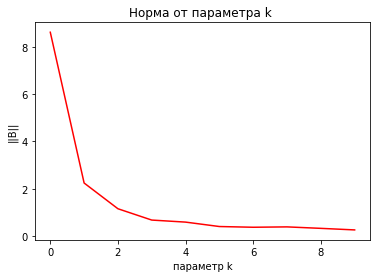

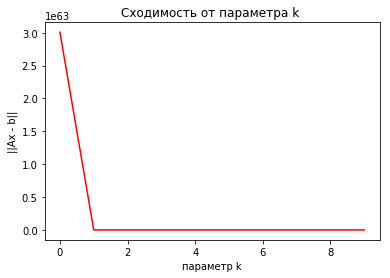

In [117]:
k = []
y = []
norm = []
for i in np.arange(0, 10, 1):
    n = 5
    A = rndm.uniform(size=(n, n)) + np.diagflat([i]*n)
    b = rndm.uniform(size=n)
    x, norma = jacobi(A, b, 100)
    print('||B||= ',norma)
    print('Ax - b = ', A @ x - b)
    k.append(i)
    y.append(np.linalg.norm(A @ x - b))
    norm.append(norma)
    
    
plt.figure()
plt.plot(k, norm, '-',color='red')
plt.title('Норма от параметра k ')
plt.xlabel('параметр k')
plt.ylabel('||B||')
plt.show()
plt.plot(k, y, '-',color='red')
plt.title('Cходимость от параметра k ')
plt.xlabel('параметр k')
plt.ylabel('||Ax - b||')
plt.show()

4) Посмотрим как завист сходимость от параметра n (размер матрицы)

||B||=  0.1766972508915701
Ax - b =  [ 1.11022302e-16 -1.11022302e-16  0.00000000e+00]
||B||=  0.14715620350503722
Ax - b =  [0. 0. 0. 0.]
||B||=  0.20672701560542608
Ax - b =  [ 0.00000000e+00  5.55111512e-17 -1.11022302e-16 -1.11022302e-16
  0.00000000e+00]
||B||=  0.34387964226225604
Ax - b =  [-5.55111512e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
||B||=  0.30620579914532936
Ax - b =  [-1.11022302e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.11022302e-16  0.00000000e+00  0.00000000e+00]
||B||=  0.3964387808330527
Ax - b =  [ 0.00000000e+00 -1.11022302e-16  1.11022302e-16  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
||B||=  0.48642324937136433
Ax - b =  [ 0.00000000e+00  1.11022302e-16  0.00000000e+00  1.11022302e-16
  0.00000000e+00 -1.11022302e-16  1.11022302e-16  0.00000000e+00
 -6.93889390e-18]
||B||=  0.5551831276985651
Ax - b =  [-1.11022302e-16 -1.38777878e-17 -2.77555756e-17  5.5511151

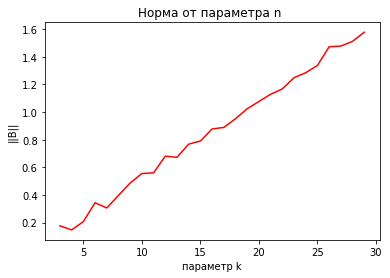

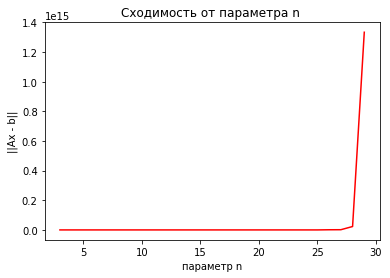

In [121]:
k = []
y = []
norm = []
for n in range(3, 30):
    A = rndm.uniform(size=(n, n)) + np.diagflat([10]*n)
    b = rndm.uniform(size=n)
    x, norma = jacobi(A, b, 100)
    print('||B||= ',norma)
    print('Ax - b = ', A @ x - b)
    k.append(n)
    y.append(np.linalg.norm(A @ x - b))
    norm.append(norma)
    
    
plt.figure()
plt.plot(k, norm, '-',color='red')
plt.title('Норма от параметра n ')
plt.xlabel('параметр k')
plt.ylabel('||B||')
plt.show()
plt.plot(k, y, '-',color='red')
plt.title('Cходимость от параметра n ')
plt.xlabel('параметр n')
plt.ylabel('||Ax - b||')
plt.show()

# II. Seidel's iteration.

##### Task II.1

Implement the Seidel's iteration. 

Test it on a random matrix. Study the convergence of iterations, relate to the norm of the iteration matrix.

(30% of the total grade)

$$Ax=b$$

$$A=L+D+U$$ 

$$(нижненетреугольная, диагональная, верхнетреугольная)$$

$$\Rightarrow x_{n+1}=-(L+D)^{-1}\cdot U\cdot x_{n}+(L+D)^{-1}\cdot b$$

$$B=-(L+D)^{-1}\cdot U \qquad \text{и} \qquad c=(L+D)^{-1}\cdot b$$

In [74]:
from numpy.linalg import inv

def seidel(A, b, n):
    x = np.ones_like(b)
    D = np.diag(np.diag(A))  
    L = np.triu(A, k=1)
    U = np.tril(A, k=-1)
    B = -inv(L + D) @ U 
    c = inv(L + D) @ b 
    LD = inv(L + D)
    norm = np.linalg.norm(B) 
    for i in range(n):
        x = LD @ (b - U @ x)
    return x, norm 

1) Проверим алгоритм на диагонально диминирующей матрице:

In [75]:
n = 5
A = rndm.uniform(size=(n, n)) + np.diagflat([10]*n)
b = rndm.uniform(size=n)
x, norm = seidel(A, b, 100)
print('||B||= {}\n'.format(norm))
print('Ax - b = ', A @ x - b)

||B||= 0.14432287812934927

Ax - b =  [-2.22044605e-16  5.55111512e-17  0.00000000e+00  0.00000000e+00
  2.77555756e-17]


Алгоритм сходится, так как истинное решение системы отличается от решения, полученного итерациями Сеиделя, на величину не более -16 порядка.

2) Проверим алгоритм на матрице, на диагонале которой стоят не доминирующие элементы:

In [20]:
n = 5
A = rndm.uniform(size=(n, n))
np.fill_diagonal(A, A.min())
b = rndm.uniform(size=n)
x, norm = seidel(A, b, 50)
print('||B||= {}\n'.format(norm))
print('Ax - b = ', A @ x - b)

||B||= 2223972.408588498

Ax - b =  [ 1.75721652e+246 -3.93503464e+245  1.46431701e+246  4.72864763e+247
  9.70323808e+230]


Если матрица не доминирующая по диагонали, то итерационный метод расходится. 

3) Посмотрим как завист сходимость от параметра k (от которого зависят элементы на диагонале)

||B||=  3.566874263872137
Ax - b =  [-3.69651760e-01  2.21942455e+27  2.79923037e+27  5.72101598e+26
  1.79279414e+27]
||B||=  1.6336807259158144
Ax - b =  [2.22044605e-16 0.00000000e+00 2.77555756e-16 1.11022302e-16
 1.11022302e-16]
||B||=  0.9596298368471939
Ax - b =  [-1.11022302e-16 -1.11022302e-16  0.00000000e+00 -5.55111512e-17
  1.11022302e-16]
||B||=  0.737637442597971
Ax - b =  [2.77555756e-17 1.11022302e-16 5.55111512e-17 0.00000000e+00
 0.00000000e+00]
||B||=  0.8128250287577463
Ax - b =  [-1.11022302e-16 -1.11022302e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00]
||B||=  0.6792734203568943
Ax - b =  [0.00000000e+00 1.11022302e-16 0.00000000e+00 1.38777878e-17
 1.11022302e-16]
||B||=  0.6314859562843667
Ax - b =  [-1.11022302e-16 -1.38777878e-17  0.00000000e+00 -2.77555756e-17
  0.00000000e+00]
||B||=  0.36530950185691996
Ax - b =  [-1.11022302e-16  0.00000000e+00 -1.11022302e-16 -5.55111512e-17
  0.00000000e+00]
||B||=  0.38100749184108723
Ax - b =  [-2.77555756e-17 -

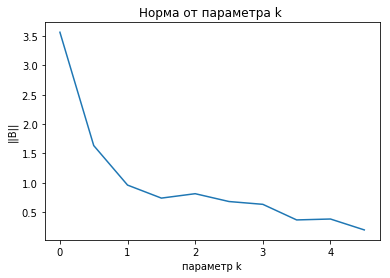

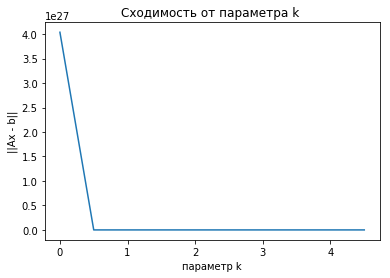

In [122]:
k = []
y = []
norm = []
for i in np.arange(0, 5, 0.5):
    n = 5
    A = rndm.uniform(size=(n, n)) + np.diagflat([i]*n)
    b = rndm.uniform(size=n)
    x, norma = seidel(A, b, 100)
    print('||B||= ',norma)
    print('Ax - b = ', A @ x - b)
    k.append(i)
    y.append(np.linalg.norm(A @ x - b))
    norm.append(norma)
    
    
plt.figure()
plt.plot(k, norm, '-')
plt.title('Норма от параметра k ')
plt.xlabel('параметр k')
plt.ylabel('||B||')
plt.show()
plt.plot(k, y, '-')
plt.title('Cходимость от параметра k ')
plt.xlabel('параметр k')
plt.ylabel('||Ax - b||')
plt.show()

4) Посмотрим как завист сходимость от параметра n (размер матрицы)

||B||=  0.10792155850995556
Ax - b =  [0.00000000e+00 0.00000000e+00 5.55111512e-17]
||B||=  0.16459494950169326
Ax - b =  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.55111512e-17]
||B||=  0.22430011528644364
Ax - b =  [ 1.38777878e-17  0.00000000e+00 -5.55111512e-17  1.38777878e-17
  1.11022302e-16]
||B||=  0.328478179780321
Ax - b =  [-2.22044605e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
||B||=  0.3648599352217581
Ax - b =  [-1.11022302e-16  5.55111512e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.08166817e-17  0.00000000e+00]
||B||=  0.4274316173170597
Ax - b =  [5.55111512e-17 1.11022302e-16 0.00000000e+00 0.00000000e+00
 5.55111512e-17 0.00000000e+00 0.00000000e+00 2.77555756e-17]
||B||=  0.5073269247175237
Ax - b =  [ 0.00000000e+00  0.00000000e+00  1.11022302e-16  5.55111512e-17
 -1.11022302e-16  0.00000000e+00  0.00000000e+00  2.22044605e-16
  0.00000000e+00]
||B||=  0.5225375932400712
Ax - b =  [ 1.11022302e-16  1.1

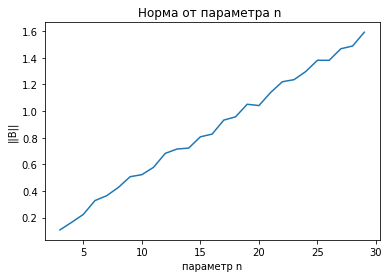

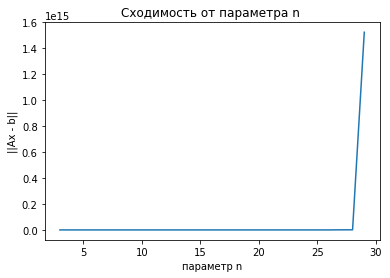

In [123]:
k = []
y = []
norm = []
for n in range(3, 30):
    A = rndm.uniform(size=(n, n)) + np.diagflat([10]*n)
    b = rndm.uniform(size=n)
    x, norma = jacobi(A, b, 100)
    print('||B||= ',norma)
    print('Ax - b = ', A @ x - b)
    k.append(n)
    y.append(np.linalg.norm(A @ x - b))
    norm.append(norma)
    
    
plt.figure()
plt.plot(k, norm, '-')
plt.title('Норма от параметра n ')
plt.xlabel('параметр n')
plt.ylabel('||B||')
plt.show()
plt.plot(k, y, '-')
plt.title('Cходимость от параметра n ')
plt.xlabel('параметр n')
plt.ylabel('||Ax - b||')
plt.show()

# III. Minimum residual scheme

### Task III.1

Implement the $\textit{minimum residual}$ scheme: an explicit non-stationary method, where at each step you select the iteration parameter $\tau_n$ to minimize the residual $\mathbf{r}_{n+1}$ given $\mathbf{r}_n$. Test it on a random matrix, study the convergence to the solution, in terms of the norm of the residual and the deviation from the ground truth solution (which you can obtain using a direct method). Study how the iteration parameter $\tau_n$ changes as iterations progress.

(50% of the grade)


$$r_n=A x_n - b$$

$$\tau_{n+1} = \frac{(A r_n, r_n)}{\| A r_n\|^2}$$

$$x_{n+1}=x_n-\tau_{n+1}r_n$$

In [91]:
def minres(A, b, n):
    x = np.ones_like(b)
    t = []
    for i in range(n):
        r = A @ x - b
        tau = np.dot(A @ r, r) / np.dot(A @ r, A @ r)
        t.append(tau)
        x = x - tau * r
    plt.figure()
    plt.plot(np.arange(n) + 1, t, '-')
    plt.title('Параметр tau от номера итерации n')
    plt.xlabel('Номер итерации n')
    plt.ylabel('Параметр tau')
    plt.show()
    return x

1) Проверим алгоритм на диагонально диминирующей матрице:

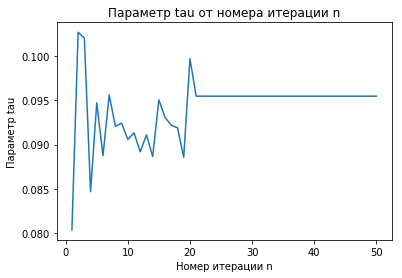

Ax - b =  [0.00000000e+00 1.11022302e-16 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


In [92]:
n = 5
A = rndm.uniform(size=(n, n)) + np.diagflat([10]*n)
b = rndm.uniform(size=n)
x = minres(A, b, 50)
print('Ax - b = ', A @ x - b)

Сходится

2) Проверим алгоритм на матрице, на диагонале которой стоят не доминирующие элементы:

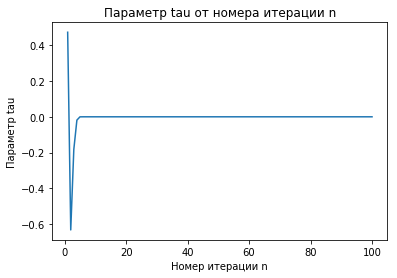

Ax - b =  [-0.34070587  0.19991592 -0.46390343  0.41844753 -0.36895339]


In [63]:
n = 5
A = rndm.uniform(size=(n, n)) 
b = rndm.uniform(size=n)
x = minres(A, b, 100)
print('Ax - b = ', A @ x - b)

Расходится

3) Посмотрим как завист сходимость от параметра k (от которого зависят элементы на диагонале)

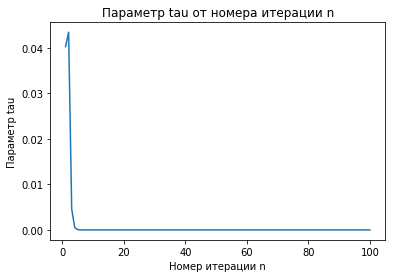

Ax - b =  [-0.35043934  0.04818626 -0.23336242  0.47296364 -0.21586511 -0.03649531
  0.14705466  0.21673981  0.16315954  0.50085578  0.30699908  0.59173094
 -0.29915479 -0.07696788  0.33587413  0.35301906 -0.01059087  0.1786002
  0.11150377  0.2933899   0.71901888 -0.53584735 -0.23459263 -0.66137704
  0.17009743  0.20716312 -0.00742228  0.01045741 -0.02110471 -0.41051999
 -0.25226134  0.20944757  0.30421017 -0.29128612  0.18554925 -0.54316467
 -0.52325174  0.19433353 -0.639267   -0.30642273  0.54280843 -0.03336621
 -0.00373261 -0.21984999  0.37849024 -0.20676521 -0.0845247   0.18627039
 -0.61571324  0.1552187 ]


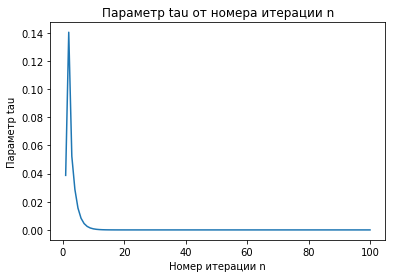

Ax - b =  [ 0.10561532 -0.31637059 -0.12379031 -0.36081321  0.14192967  0.55854704
  0.01822847  0.21013362 -0.23254619 -0.27332951 -0.14230006 -0.00664083
  0.12974021  0.1569485  -0.25925364  0.20969157  0.23322531  0.00457387
  0.05449171  0.51341662 -0.26984299 -0.00953603  0.4620896   0.3942285
 -0.20738269  0.14236892  0.16081914  0.40297782 -0.04926357 -0.10777256
  0.43471113  0.4596062  -0.43602873 -0.4836313  -0.19238402 -0.48474141
 -0.45824883 -0.60995837  0.29515375 -0.46392171  0.41845865 -0.45799532
  0.05666295  0.19405973 -0.19705496  0.16545505  0.28102305  0.16124366
  0.00429297 -0.27930783]


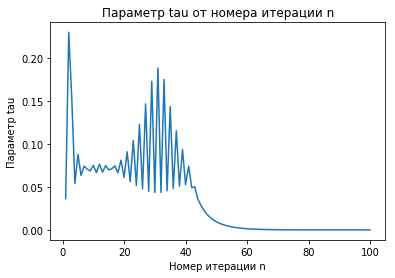

Ax - b =  [ 0.06291934 -0.0394997  -0.03834621 -0.07623242  0.06956754 -0.04628491
  0.02069401 -0.04091668 -0.04421262  0.03859708  0.02250085  0.0314287
  0.07350407  0.0061639   0.02973101  0.00089006  0.02211917  0.00185586
 -0.09136468  0.00394357  0.03577892  0.00583617 -0.05383682 -0.02129371
 -0.01748563  0.01793904 -0.13270025 -0.06439975  0.05611062 -0.02863517
  0.02956279  0.03699051  0.00218204 -0.06170006  0.0480159  -0.06191808
  0.0105493  -0.03249156  0.02630931 -0.08696835  0.05431125  0.05631287
  0.00086939  0.03652962 -0.01487357 -0.01440012  0.07929713  0.04359391
 -0.01904817  0.02715962]


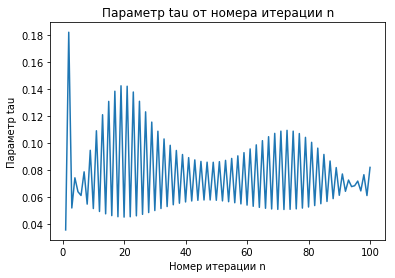

Ax - b =  [-1.51959395e-04  4.58024252e-05  3.93324980e-05  6.13247425e-05
 -3.77668179e-05 -2.83909569e-05 -6.36615469e-05 -7.74566153e-06
 -2.84659947e-05 -2.97904001e-05 -4.24736066e-05 -7.27483290e-05
 -5.45507849e-05  1.29562700e-05  3.06835507e-05  1.99945401e-05
 -2.30390649e-05  3.65839444e-05 -2.25455841e-05  4.83427700e-05
  8.51273780e-06 -1.75641571e-05  9.47880040e-06 -8.70165088e-05
  3.56137094e-05 -5.86868665e-05  8.84198223e-05 -7.32541795e-05
  3.17698337e-05 -1.25477081e-05 -8.51538145e-06 -7.25051647e-05
 -4.31669208e-05 -3.63154763e-05 -1.18766780e-05 -2.77891791e-05
 -2.32742784e-05  6.73451097e-05 -1.16257010e-05  9.13600035e-06
  1.51032515e-05  8.36197660e-05 -4.41327654e-06 -1.33251576e-04
  5.27218931e-05  1.74681516e-05  5.12709922e-05 -1.10291782e-04
 -1.54440574e-05 -2.63619808e-05]


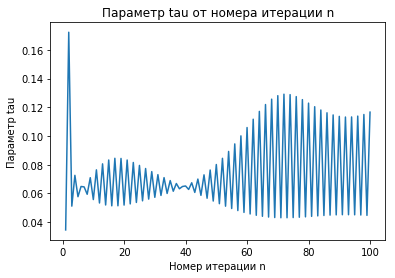

Ax - b =  [-8.35473202e-09 -3.86651167e-09 -1.02232807e-08  3.17855070e-09
 -1.02597754e-08 -6.50363607e-09 -1.44137258e-09 -4.66047489e-09
 -3.89576571e-09  4.22717905e-09 -9.13500831e-10 -1.91518623e-09
 -6.00393568e-09 -3.91709554e-09 -5.31358024e-09 -5.73564773e-09
 -2.82441770e-09 -6.25753827e-09  1.85498361e-09  5.24494331e-09
 -1.70300252e-09  4.39905443e-09 -4.48805709e-09  3.72039266e-09
  1.04148601e-09 -1.01852526e-10 -1.58780400e-09 -7.41907502e-09
  1.96177363e-09  7.91144927e-13 -2.45879150e-09 -5.06066250e-09
 -6.62356292e-09 -8.08485490e-09 -5.79360449e-10  1.04004927e-09
 -3.88458732e-09 -3.83699028e-09 -9.09269993e-10  3.63731273e-09
 -7.76079911e-09  1.67727054e-09 -1.53161911e-09  4.78183937e-10
 -5.35848044e-09  9.14975762e-10  3.79723275e-09  2.43766562e-09
  5.66085623e-09 -2.54293558e-09]


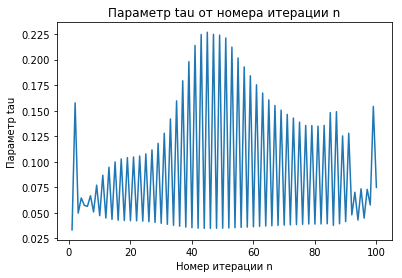

Ax - b =  [ 3.33066907e-16  1.11022302e-16  0.00000000e+00  0.00000000e+00
 -1.11022302e-16  1.11022302e-16 -2.22044605e-16  1.11022302e-16
 -1.11022302e-16  0.00000000e+00  1.11022302e-16  0.00000000e+00
  0.00000000e+00 -1.11022302e-16  5.55111512e-17  0.00000000e+00
  0.00000000e+00 -1.11022302e-16 -1.11022302e-16  0.00000000e+00
 -1.11022302e-16  0.00000000e+00  0.00000000e+00 -2.22044605e-16
  5.55111512e-17 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16
  0.00000000e+00  0.00000000e+00  1.11022302e-16  0.00000000e+00
  1.11022302e-16  0.00000000e+00  0.00000000e+00 -5.55111512e-17
 -4.16333634e-17 -1.11022302e-16 -5.55111512e-17  0.00000000e+00
  0.00000000e+00  1.11022302e-16 -5.55111512e-17  0.00000000e+00
  0.00000000e+00 -3.33066907e-16  0.00000000e+00  1.11022302e-16
  0.00000000e+00  0.00000000e+00]


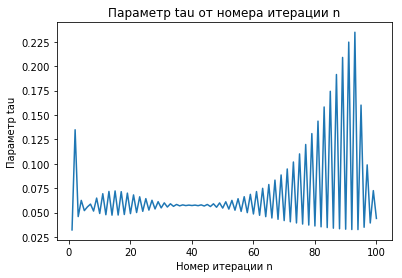

Ax - b =  [ 1.11022302e-16 -5.55111512e-17  0.00000000e+00  1.11022302e-16
  0.00000000e+00 -5.55111512e-17  2.77555756e-17  0.00000000e+00
  0.00000000e+00  2.77555756e-17  0.00000000e+00 -1.11022302e-16
  1.11022302e-16  0.00000000e+00 -5.55111512e-17  0.00000000e+00
  0.00000000e+00  1.11022302e-16 -5.55111512e-17  0.00000000e+00
  0.00000000e+00 -1.11022302e-16 -2.77555756e-17  0.00000000e+00
 -5.55111512e-17 -1.11022302e-16  0.00000000e+00 -1.11022302e-16
  0.00000000e+00 -1.11022302e-16  0.00000000e+00  1.11022302e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.55111512e-17
  1.11022302e-16  0.00000000e+00  5.55111512e-17  0.00000000e+00
  8.32667268e-17  2.77555756e-17  0.00000000e+00 -1.38777878e-16
  0.00000000e+00  5.55111512e-17  2.77555756e-17  2.77555756e-17
  0.00000000e+00  0.00000000e+00]


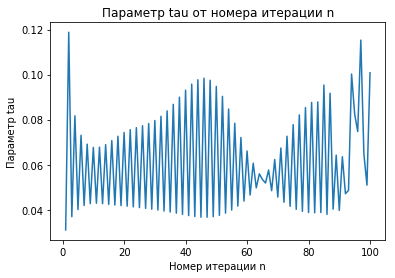

Ax - b =  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  6.93889390e-18
  0.00000000e+00  1.11022302e-16  2.77555756e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.11022302e-16
 -5.55111512e-17  0.00000000e+00  0.00000000e+00  1.11022302e-16
  0.00000000e+00 -5.55111512e-17  0.00000000e+00  0.00000000e+00
  1.11022302e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.77555756e-17
  5.55111512e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.11022302e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.55111512e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


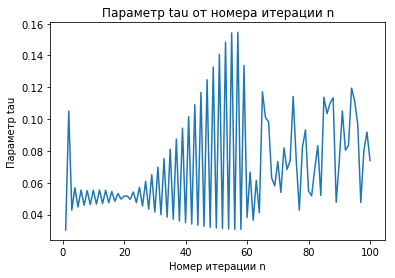

Ax - b =  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.77555756e-17
  0.00000000e+00  0.00000000e+00  2.77555756e-17  2.77555756e-17
  5.55111512e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.11022302e-16  1.11022302e-16  1.11022302e-16
 -2.77555756e-17  1.11022302e-16  5.55111512e-17  0.00000000e+00
 -5.55111512e-17  0.00000000e+00  2.77555756e-17  0.00000000e+00
  0.00000000e+00  5.55111512e-17  0.00000000e+00  0.00000000e+00
  1.11022302e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.55111512e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


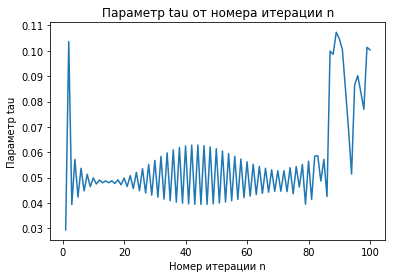

Ax - b =  [ 0.00000000e+00  2.77555756e-17  0.00000000e+00 -5.55111512e-17
 -2.77555756e-17 -1.11022302e-16 -1.38777878e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.11022302e-16  1.38777878e-17  9.71445147e-17
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.11022302e-16  1.11022302e-16
  0.00000000e+00  0.00000000e+00  1.11022302e-16  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.11022302e-16 -1.11022302e-16
  0.00000000e+00 -1.11022302e-16  2.77555756e-17  1.11022302e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.55111512e-17 -2.77555756e-17  0.00000000e+00 -5.55111512e-17
  0.00000000e+00  1.11022302e-16  0.00000000e+00  0.00000000e+00
 -1.11022302e-16  0.00000000e+00]


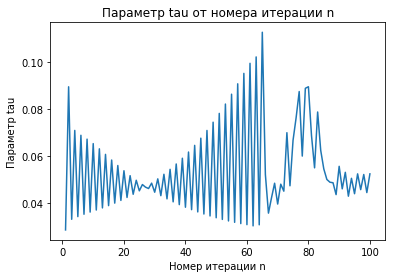

Ax - b =  [-1.38777878e-17 -1.38777878e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -8.32667268e-17
  0.00000000e+00  0.00000000e+00 -5.55111512e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.55111512e-17  0.00000000e+00 -1.11022302e-16 -1.11022302e-16
  0.00000000e+00 -1.11022302e-16 -2.77555756e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.11022302e-16 -1.11022302e-16 -2.77555756e-17 -2.77555756e-17
 -1.11022302e-16  0.00000000e+00  0.00000000e+00  1.38777878e-17
 -5.55111512e-17  0.00000000e+00  0.00000000e+00 -1.38777878e-17
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.77555756e-17]


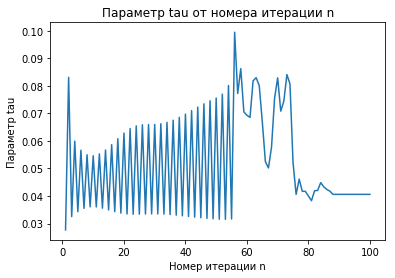

Ax - b =  [-1.11022302e-16  0.00000000e+00  0.00000000e+00 -1.11022302e-16
 -5.55111512e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.55111512e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.11022302e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.11022302e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.11022302e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -5.55111512e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.11022302e-16 -5.55111512e-17
 -1.11022302e-16  0.00000000e+00  0.00000000e+00 -1.11022302e-16
 -1.11022302e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.11022302e-16  0.00000000e+00]


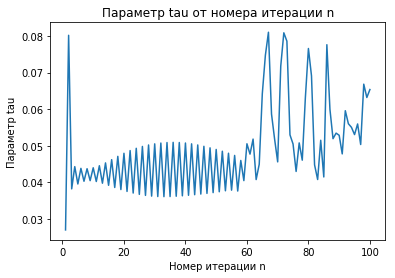

Ax - b =  [ 0.00000000e+00  2.77555756e-17  2.77555756e-17  2.77555756e-17
  0.00000000e+00  0.00000000e+00  2.77555756e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.11022302e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.77555756e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.55111512e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.77555756e-17  5.55111512e-17 -5.55111512e-17
  0.00000000e+00  1.11022302e-16  0.00000000e+00 -2.77555756e-17
  1.11022302e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.11022302e-16  1.11022302e-16  8.32667268e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.55111512e-17]


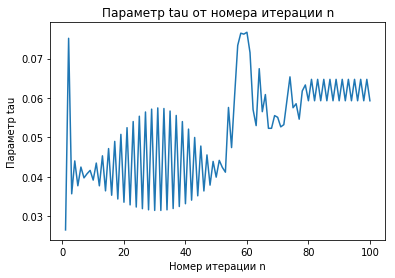

Ax - b =  [-5.55111512e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.38777878e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.11022302e-16  0.00000000e+00
  0.00000000e+00 -1.38777878e-17  0.00000000e+00  0.00000000e+00
 -1.11022302e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.77555756e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.11022302e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.77555756e-17  0.00000000e+00  0.00000000e+00
 -2.77555756e-17  1.11022302e-16 -2.77555756e-17 -1.11022302e-16
  2.77555756e-17  0.00000000e+00  0.00000000e+00 -2.77555756e-17
  0.00000000e+00  0.00000000e+00 -2.77555756e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.11022302e-16
  0.00000000e+00  0.00000000e+00]


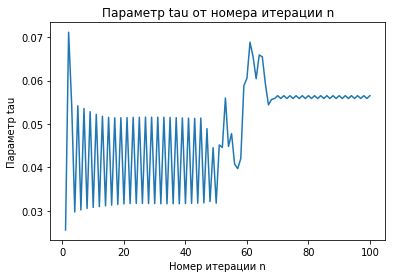

Ax - b =  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  5.55111512e-17
  0.00000000e+00  1.11022302e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.11022302e-16  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.11022302e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.11022302e-16  0.00000000e+00  2.77555756e-17
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.11022302e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.38777878e-17
  0.00000000e+00  0.00000000e+00]


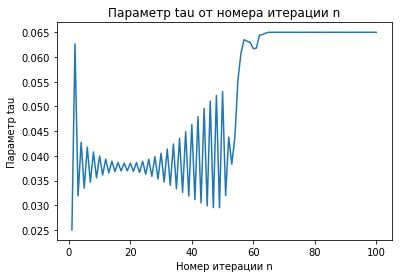

Ax - b =  [ 0.00000000e+00  0.00000000e+00 -1.11022302e-16  0.00000000e+00
  4.16333634e-17  0.00000000e+00 -2.77555756e-17  0.00000000e+00
  0.00000000e+00 -1.38777878e-17  0.00000000e+00 -2.77555756e-17
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.16333634e-17
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.11022302e-16
  0.00000000e+00  0.00000000e+00  2.77555756e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.11022302e-16  1.11022302e-16  0.00000000e+00
  0.00000000e+00 -1.11022302e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00  4.16333634e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.55111512e-17  1.11022302e-16  1.38777878e-17
  2.77555756e-17 -1.11022302e-16]


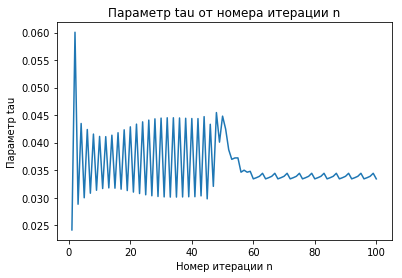

Ax - b =  [ 0.00000000e+00  0.00000000e+00 -2.77555756e-17  0.00000000e+00
 -5.55111512e-17 -1.11022302e-16 -5.55111512e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.55111512e-17 -5.55111512e-17
  0.00000000e+00 -2.77555756e-17  0.00000000e+00  0.00000000e+00
 -4.16333634e-17 -1.11022302e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.11022302e-16  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.11022302e-16 -1.11022302e-16
 -2.77555756e-17  0.00000000e+00 -2.77555756e-17  0.00000000e+00
  0.00000000e+00 -1.11022302e-16  0.00000000e+00 -2.77555756e-17
  0.00000000e+00  0.00000000e+00 -1.11022302e-16 -5.55111512e-17
 -2.77555756e-17 -2.77555756e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


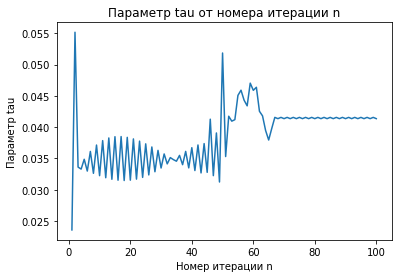

Ax - b =  [ 5.55111512e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.38777878e-17  0.00000000e+00  2.77555756e-17  2.77555756e-17
  0.00000000e+00  0.00000000e+00  1.11022302e-16  2.77555756e-17
  1.11022302e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.11022302e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.11022302e-16  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.11022302e-16  1.11022302e-16  0.00000000e+00  0.00000000e+00
  2.77555756e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.11022302e-16  0.00000000e+00  2.77555756e-17
  2.77555756e-17  0.00000000e+00]


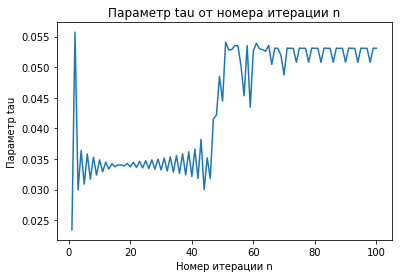

Ax - b =  [ 0.00000000e+00  0.00000000e+00 -1.11022302e-16  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.11022302e-16  0.00000000e+00  0.00000000e+00 -2.77555756e-17
  0.00000000e+00  2.77555756e-17 -1.11022302e-16  2.22044605e-16
  0.00000000e+00  2.77555756e-17  0.00000000e+00 -1.11022302e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -5.55111512e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.11022302e-16  0.00000000e+00  0.00000000e+00
  1.11022302e-16 -5.55111512e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


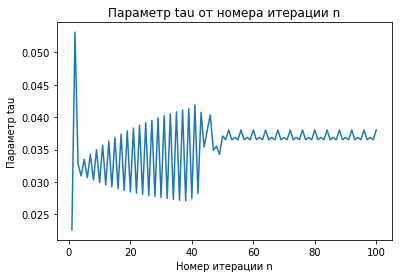

Ax - b =  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.77555756e-17  0.00000000e+00  0.00000000e+00 -5.55111512e-17
  0.00000000e+00  0.00000000e+00 -2.77555756e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.77555756e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.55111512e-17 -1.11022302e-16
 -2.77555756e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.77555756e-17 -1.11022302e-16
 -1.38777878e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.11022302e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.11022302e-16  0.00000000e+00]


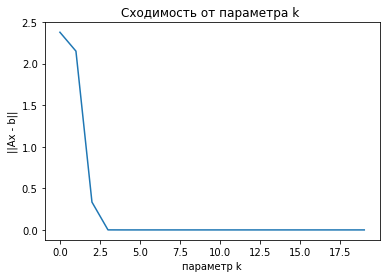

In [94]:
k = []
y = []
norm = []
for i in np.arange(0, 20):
    n = 50
    A = rndm.uniform(size=(n, n)) + np.diagflat([i]*n)
    b = rndm.uniform(size=n)
    x = minres(A, b, 100)
    print('Ax - b = ', A @ x - b)
    k.append(i)
    y.append(np.linalg.norm(A @ x - b))
    
    
plt.figure()
plt.plot(k, y, '-')
plt.title('Cходимость от параметра k ')
plt.xlabel('параметр k')
plt.ylabel('||Ax - b||')
plt.show()

4) Посмотрим как завист сходимость от параметра m (размер матрицы)

/Users/kirillsikamov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


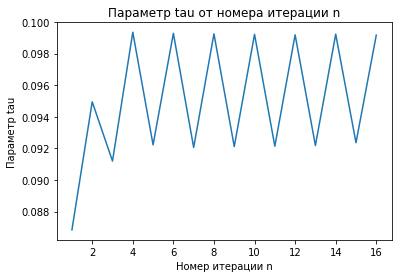

Ax - b =  [nan nan nan]


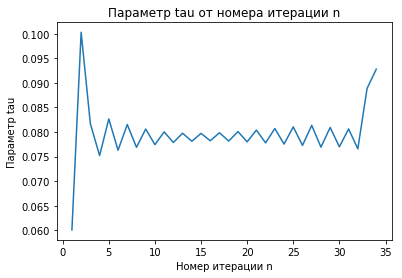

Ax - b =  [nan nan nan nan nan nan nan nan nan nan nan nan nan]


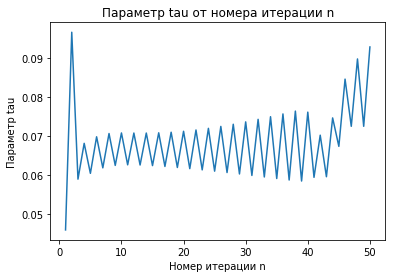

Ax - b =  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.38777878e-17 -1.38777878e-17 -2.77555756e-17  0.00000000e+00
  0.00000000e+00 -6.93889390e-18  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]


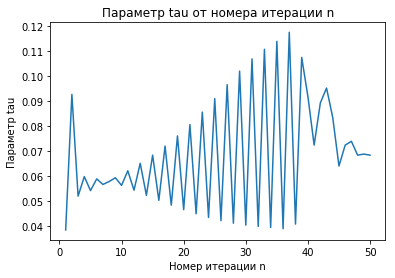

Ax - b =  [-5.55111512e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.77555756e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.77555756e-17  0.00000000e+00
  1.38777878e-17  0.00000000e+00  0.00000000e+00 -1.38777878e-17
 -2.77555756e-17  0.00000000e+00 -1.38777878e-17 -1.11022302e-16
  0.00000000e+00]


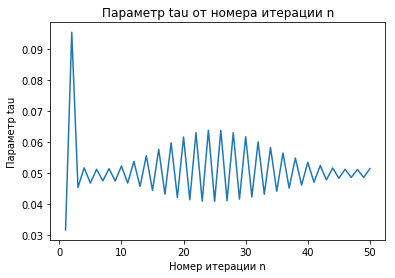

Ax - b =  [ 1.21014310e-14  6.99440506e-15  2.23154828e-14  7.29971639e-15
  3.52773366e-14 -1.94289029e-14 -4.96824804e-14 -3.93018951e-14
  4.44089210e-16 -3.20854454e-14  7.76878561e-14 -1.28563826e-13
 -5.11812814e-14 -9.53126467e-14  2.77000645e-14 -1.52933222e-14
 -1.55875313e-13  3.03090886e-14 -3.20854454e-14  7.70217223e-14
 -6.16173779e-14  4.54081217e-14 -3.78586051e-14 -1.39416256e-13
 -1.29063427e-13 -1.33448808e-13  1.94289029e-14 -2.38586928e-13
  5.62883073e-14 -6.19782003e-14  2.67841305e-14  8.54871729e-15
  2.60902411e-14 -5.73985304e-14 -2.65343303e-14 -1.54321000e-13
 -9.41469125e-14 -1.50213175e-13 -4.21884749e-14 -6.95554725e-14
 -4.81281681e-14 -4.98490138e-14  9.10382880e-15]


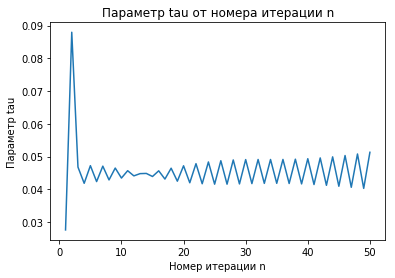

Ax - b =  [-5.86852789e-12  3.35753647e-12 -2.54436472e-11  1.69553815e-11
 -1.05757625e-11  4.76618744e-12 -2.04013473e-11  1.07092113e-12
 -5.29337685e-12  2.20146124e-12  2.94497760e-12 -9.67936842e-12
  4.61941596e-12 -4.37017089e-12 -1.37557743e-11 -3.45830864e-11
 -2.60059474e-11  4.99966735e-12 -2.55374610e-11  1.87144744e-12
 -3.29558603e-12 -1.41647805e-11 -1.56275548e-11 -1.16541776e-11
  5.51525492e-12 -2.61801691e-11 -1.13820064e-12 -7.10925763e-12
  6.40765219e-12  1.66495706e-11 -7.02560232e-12  1.35942924e-11
 -1.25844890e-11 -1.04425357e-11  4.47578086e-12 -1.63127289e-11
  5.67368375e-12 -8.45212789e-12 -3.08664205e-11 -4.62280214e-12
 -2.03268513e-11 -4.49995596e-12 -3.36247696e-11  8.44613268e-12
 -1.07006626e-11  9.44488932e-12 -8.92391716e-12 -9.76657644e-12
 -2.04209982e-11  9.93727323e-12 -9.35973521e-12 -2.82396606e-11
 -1.29793953e-11]


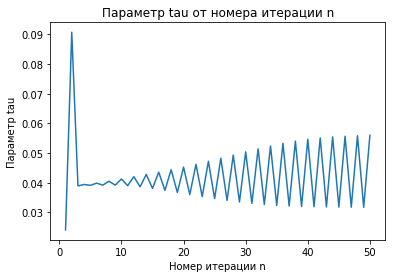

Ax - b =  [-1.10692899e-10 -8.75308159e-11 -4.54701832e-11 -2.50317433e-10
  1.29840166e-11 -8.45064574e-11 -1.18565435e-10  2.39988585e-11
 -5.02303754e-11  5.41779954e-11  3.92399446e-11 -1.42147294e-10
 -3.94623223e-11 -1.25492283e-10 -2.14636198e-10 -6.65038025e-11
 -8.25823021e-11 -8.44250433e-11 -1.85337079e-10 -2.25331642e-10
 -8.83415840e-11 -2.19549379e-11 -2.29556929e-10 -1.26326727e-12
 -1.16438359e-10  1.06328280e-10 -1.21002375e-10  1.07470310e-10
  8.58313559e-11 -1.45488510e-10  6.82550128e-11  1.17132082e-10
 -2.83637780e-10 -1.26262445e-10 -8.54527560e-12 -2.54506721e-10
 -3.06471293e-10 -4.60589344e-11 -3.73716613e-11 -3.54314134e-10
  2.41005993e-10 -1.47049151e-10 -5.64260305e-11  4.22736290e-11
 -1.06883280e-10 -2.73627121e-10 -1.77266646e-10  5.68454728e-11
 -1.31612166e-10 -1.31210931e-10 -3.07908143e-10 -1.96479666e-10
  2.16604512e-13  4.86780616e-11 -5.99218453e-11 -1.45880349e-10
 -1.56369251e-10 -2.55009458e-10  2.67094957e-10 -2.19936180e-10
  1.60348401e-1

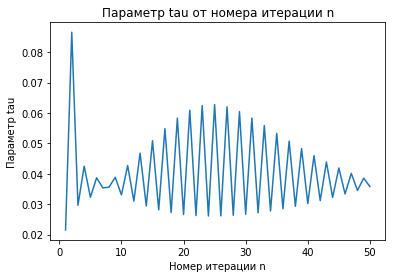

Ax - b =  [-9.34986422e-10  1.03272502e-10 -2.35046760e-10  6.80578705e-10
  5.05604780e-10 -3.39537065e-10 -8.12024337e-10  1.42601925e-09
 -9.48235379e-10  4.17254564e-10  2.44148424e-10  3.74223430e-11
  7.72477193e-10 -1.04085074e-10  5.38684541e-10 -9.05460928e-10
  7.86960497e-11 -5.77921377e-10 -2.20797824e-11 -9.75241776e-10
 -3.78033937e-10  6.03207262e-10 -4.84429163e-10 -5.56173496e-10
  9.64460317e-11 -1.18719173e-09 -8.94104873e-10  8.53233151e-10
  6.55508980e-11  9.06900333e-10 -1.33151656e-09 -3.65278363e-10
 -1.11290521e-09 -1.09268733e-10 -1.72791226e-10 -8.55956639e-10
 -7.26074756e-10 -7.55386864e-10 -3.99978217e-10 -1.24882493e-10
  4.62770267e-10 -9.78376602e-10 -1.06062092e-09 -5.87488835e-10
  3.31951799e-10 -7.17997772e-10  3.43995471e-10 -2.09875228e-10
  1.43858259e-11 -2.56410670e-10 -6.95645541e-10 -1.06354525e-09
 -9.76154380e-10 -2.85749199e-10 -1.36626443e-09 -5.62916380e-12
 -5.64558733e-10 -1.08913623e-09 -1.91983884e-09 -4.59669469e-10
 -3.84197119e-1

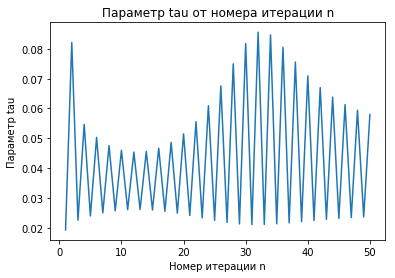

Ax - b =  [-5.48301404e-11  2.59431365e-11 -8.73960904e-11 -1.38634104e-10
 -1.75072290e-10 -1.54370849e-10 -3.82993637e-12  3.98187039e-11
 -1.00519371e-10 -2.23669416e-10 -1.92256211e-11  8.70188921e-11
 -9.01989594e-11 -1.07398757e-10 -1.24660282e-10  3.75308118e-11
 -1.40053746e-10 -1.72256487e-10 -1.27773570e-10 -8.08994538e-11
 -6.37692121e-11  3.06198400e-11 -1.56072377e-10 -1.24630306e-10
  3.70238284e-11 -1.26046451e-10  8.28133118e-11 -8.59969873e-11
  4.19294044e-11 -5.85883564e-11  5.55994140e-11  4.30752101e-11
  6.22135676e-12  7.35413397e-11 -3.50423024e-11 -9.36281053e-11
 -3.55477869e-11 -1.70429004e-10 -1.19803167e-10 -5.93552985e-11
 -2.68014777e-11 -7.27621297e-11 -2.81670243e-11  8.72208139e-11
  2.42407761e-11  3.08408299e-11  4.67189620e-11 -7.97347188e-11
 -1.02224340e-11 -3.25124649e-11 -1.94826100e-12 -1.07602816e-11
 -1.18036303e-10 -1.55499502e-10 -6.50496323e-11 -1.12637122e-10
 -2.06601958e-11 -3.68118869e-11 -1.52294399e-10 -1.21938237e-10
 -8.33894620e-1

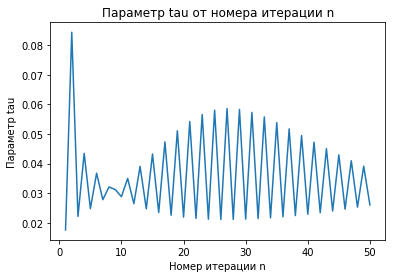

Ax - b =  [ 1.13351796e-08  3.13928966e-09 -3.50494034e-09 -2.65943051e-09
  9.14565534e-09  9.39693767e-09 -2.74075403e-08  1.50644411e-08
 -1.91711435e-08 -4.47427712e-08 -5.11810017e-09  1.50506279e-08
 -2.94360519e-08 -3.16254700e-08  1.07975935e-08 -1.31100031e-09
 -3.90772686e-08 -6.15366513e-09 -3.63027552e-09  7.27876948e-09
  6.24623381e-09 -1.09031076e-08 -1.59685248e-08 -1.17509231e-08
 -1.06019893e-08 -7.87815657e-09 -5.42679290e-08  1.04664827e-08
  3.47615237e-08  3.28135203e-08 -4.24837765e-09 -2.18547982e-08
 -1.08540414e-08 -2.02988517e-08 -7.29961971e-09 -1.44883440e-08
 -9.94320104e-09  2.72189816e-08  2.35134923e-09  2.58230476e-09
 -4.80546654e-08 -2.11660578e-09  2.77978851e-08  7.90144594e-09
  1.37138217e-10  1.05155085e-08 -2.93950870e-08 -6.13522139e-09
 -1.59177224e-08 -5.24416378e-08  1.44626082e-08  1.05013425e-08
  1.28458761e-08 -7.06275605e-09 -5.78938162e-08  8.72472780e-09
 -1.72058731e-08  4.77261769e-09  7.64618463e-09 -8.88585650e-10
 -1.79629984e-0

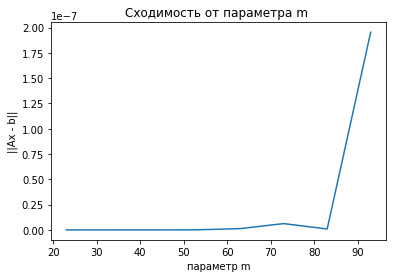

In [111]:
k = []
y = []
norm = []
for n in np.arange(3, 100, 10):
    A = rndm.uniform(size=(n, n)) + np.diagflat([10]*n)
    b = rndm.uniform(size=n)
    x = minres(A, b, 50)
    print('Ax - b = ', A @ x - b)
    k.append(n)
    y.append(np.linalg.norm(A @ x - b))
    norm.append(norma)
    
    
plt.figure()
plt.plot(k, y, '-')
plt.title('Cходимость от параметра m ')
plt.xlabel('параметр m')
plt.ylabel('||Ax - b||')
plt.show()

Видно, что при небьльших m метод не работает, но в определеленном интервале метод сходится хорошо